# GPU Particles

We now build upon the last examples to show how to do both gpu compute work and instancing at the same time.

We initialize our camera and meshes just like before, but we also make a generic buffer (i.e. an SSBO) for generic data storage, like this:

```cpp
std::vector<Particle> particles(100);
    i = 0;
    for(auto& particle: particles)
    {
        uint q = i / 10;
        uint r = i % 10;
        particle.pos = Eigen::Vector4f(q / 10.f, r / 10.f, 0, 0);
        i++;
    }
    gallery.StoreBuffer<SerializeParticles>(particles, "particles");
```

note that we use `StoreBuffer` as opposed to `StoreMesh` when creating generic buffers, see the serializing function as well to understand how to repurpose this snippet for your goals.

When everything has been initialize, we invoke the compute shader with the command:

```cpp
 modules.Compute({
    compute_shader,
    {},
    {{gallery.GetGpuBufferData("particles"), 0}}, 
    {100, 1, 1}}
);
```

No images are used in this example, hence the empty array, we do need an SSBO bound at binding point 0, which we declare with the second command. Finally we must specify how much work is to be done by the compute shader, which is our last parameter (100 invocations on the X dimension and 1 invocation on the Y and Z dimensions).

As you can see it is not too dissimilar from invoking a draw command, the main differences is that compute requests don't have mesh inputs and they require a workgroup description.

Next we also set the instance buffer of our mesh request, telling the gpu to both copy our input mesh a certain number of times and use our `particles` buffer as the per instance data of the shader invocation:

```cpp
modules.Draw({
    phong_shader,
    {gallery.GetGpuMeshData("sphere"),          // Mesh inputs
     gallery.GetGpuBufferData("particles"),     // Instance buffer
     100                                        // Instance count
    }},
    mvp, 0,
    camera.GetPosition(), 1);
```

Running this example should show a group of particles starting in a square and slowly moving towards the top right portion of the screen. Note, this is all GPU driven, the CPU merely initialized the data, from that point on, all our data updates are done on the GPU!

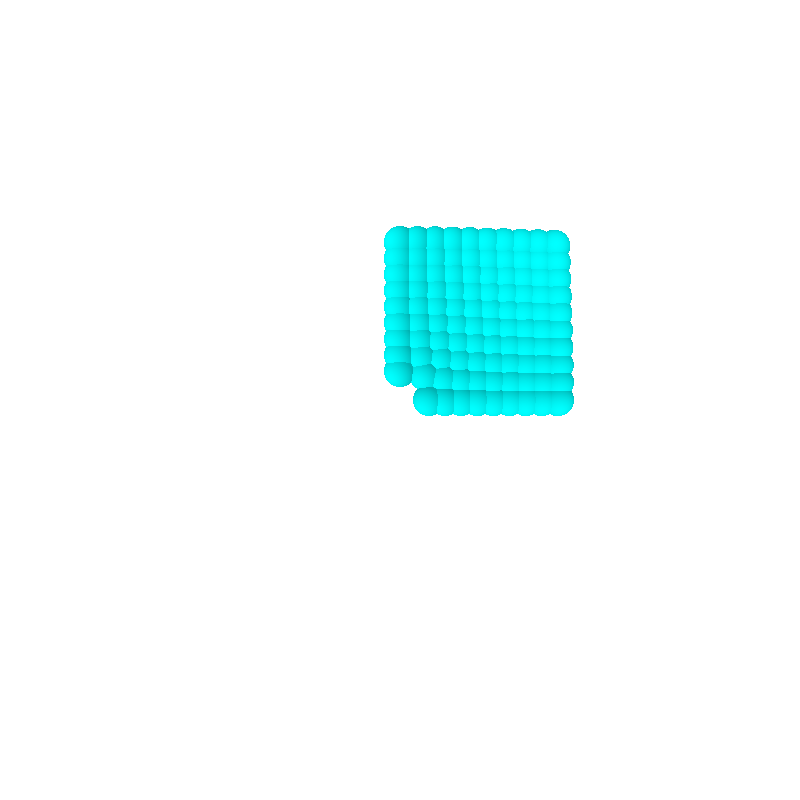

In [1]:
import os
import sys
import pathlib

parentdir = os.path.dirname(pathlib.Path().resolve())

sys.path.insert(0, parentdir) 

import run_example

name = run_example.ScreenShotExample(os.path.abspath(pathlib.Path().resolve()), capture_frame=80)

from IPython.display import Image

Image(filename=f'Documentation/{name}.png')